In [4]:
# Import library dasar
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (8, 6)

In [5]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['target'].value_counts()
print('nama kelas;', wine.target_names)

nama kelas; ['class_0' 'class_1' 'class_2']


In [15]:
X = wine.data
y = wine.target

print("",X.shape)
print("",y.shape)

 (178, 13)
 (178,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)


print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (124, 13)
Ukuran X_test: (54, 13)
Ukuran y_train: (124,)
Ukuran y_test: (54,)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.62844732,  1.08120605, -0.65212742,  0.        , -0.8414766 ,
        -1.00335756, -1.51706225,  1.71144809, -1.23077056,  0.33317435,
        -0.64137827, -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372,  0.28817977, -1.03748743,
        -0.11258512, -0.08675106, -0.35047592, -0.19503558, -0.93349517,
         0.34652993,  1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, -1.35444491,  2.29469668,
        -0.57332948, -0.15628008, -0.11256161,  2.01453238, -0.72238359,
         0.43243499, -0.39843366,  0.04196031],
       [ 0.37787668, -0.69497183,  1.7479397 , -1.15271907,  0.59593615,
         0.50174071,  0.6681354 , -0.19186638, -0.40218258, -0.1716577 ,
         0.56129258,  0.24658617,  0.47033286],
       [-0.80338488,  0.3889521 , -0.54135509, -0.43226965, -0.8414766 ,
         0.27136852,  0.24102858, -0.9056093 ,  0.68533915, -1.29605638,
         0.81900777,  0.96022513, -1.47381948]])

In [18]:
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi SVM tanpa PCA: 0.9814814814814815

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [24]:
explained_var = pca.explained_variance_ratio_

In [19]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Shape X_train_pca:", X_train_pca.shape)
print("Shape X_test_pca :", X_test_pca.shape)

Shape X_train_pca: (124, 3)
Shape X_test_pca : (54, 3)


In [21]:
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("\nAkurasi SVM dengan PCA (3 komponen):", acc_pca)

print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))


Akurasi SVM dengan PCA (3 komponen): 1.0

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



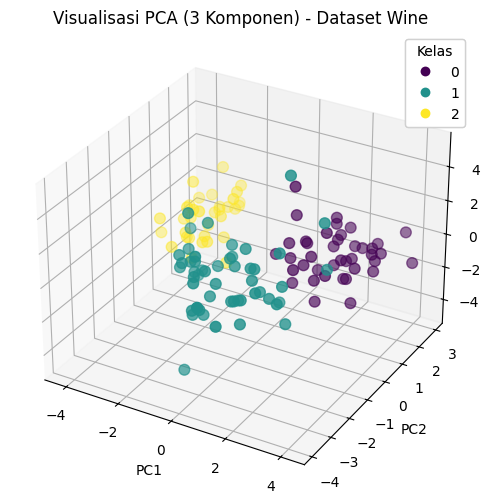

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend1)

plt.show()

In [25]:
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variansi Total PCA': [None, explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,13,0.981481,NaN
1,SVM Dengan PCA (3 Komponen),3,1.000000,0.666166
